# Experiment with Bumbs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot inline
%matplotlib inline

# Add the proper path
import sys
sys.path.append("../")

# Local libraries
from signals.aux_functions import bump
from inputs.sensors import Sensor, PerceptualSpace
from inputs.lag_structure import LagStructure



In [3]:
Tmax = 1000
dt = 0.1
time = np.arange(0, Tmax, dt)

### Parameters of the bumbs

In [4]:
center1 = 300.0
center2 = 700.0
offset = 100.0
Max = 100.0

signal1 = bump(time, offset, center1, Max)
signal2 = bump(time, offset, center2, Max)


signal1 += signal1 + np.random.rand(signal1.size)
signal2 += signal2 + np.random.rand(signal2.size)

### We plot the bumps

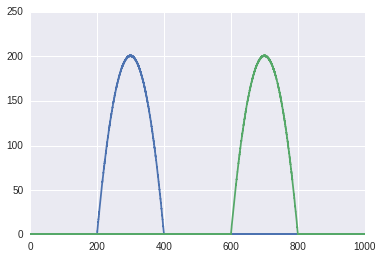

In [5]:
plt.plot(time, signal1)
plt.hold(True)
plt.plot(time, signal2)

## Nexa Analysis


### First we define the PerceptualSpace

In [6]:
lag_times = np.linspace(0, 600, 4) # Go two times the period
window_size = 2 * offset
Nwindowsize = int(window_size / dt) 
weights = None
lag_structure = LagStructure(lag_times=lag_times, weights=weights, window_size=window_size)
sensor1 = Sensor(signal1, dt, lag_structure)
sensor2 = Sensor(signal2, dt, lag_structure)
sensors = [sensor1, sensor2]
perceptual_space = PerceptualSpace(sensors, lag_first=True)

### Now we Start Nexa

In [7]:
from nexa.nexa import Nexa

Nspatial_clusters = 2  # Number of spatial clusters
Ntime_clusters = 4  # Number of time clusters
Nembedding = 2  # Dimension of the embedding space

# Now the Nexa object
nexa_object = Nexa(perceptual_space, Nspatial_clusters,
                   Ntime_clusters, Nembedding)

# Make all the calculations

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


### Visualization

In [8]:
# Visualization libraries
from visualization.sensor_clustering import visualize_cluster_matrix
from visualization.sensors import visualize_SLM
from visualization.sensors import visualize_STDM_seaborn

#### Visualize SLM

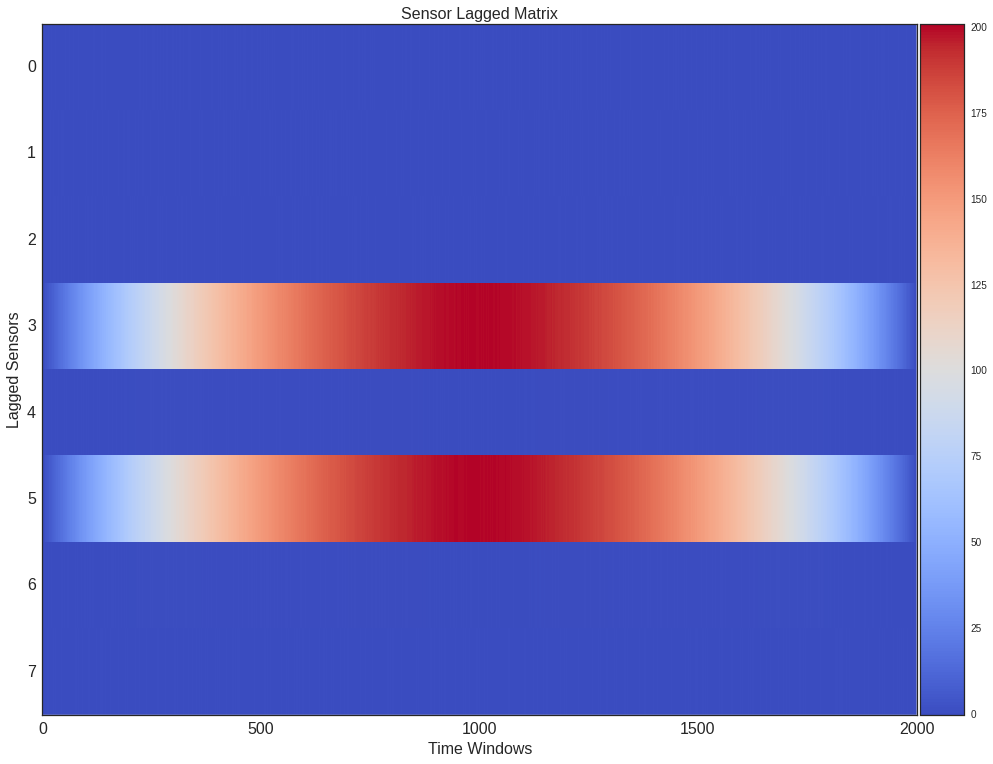

In [9]:
%matplotlib inline
fig = visualize_SLM(nexa_object)
plt.show(fig)

#### Spatio Temporal Distance Matrix

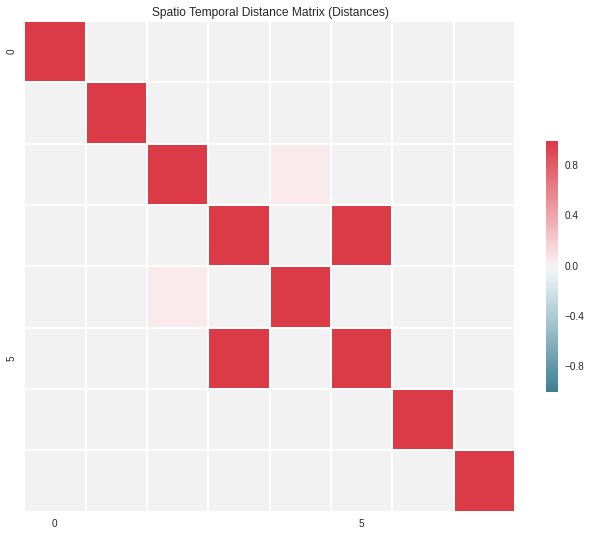

In [10]:
#  fig = visualize_STDM(nexa_object)
nexa_object.calculate_distance_matrix()
fig = visualize_STDM_seaborn(nexa_object)
plt.show(fig)

#### We check how the embedding looks on 2 dimensions.

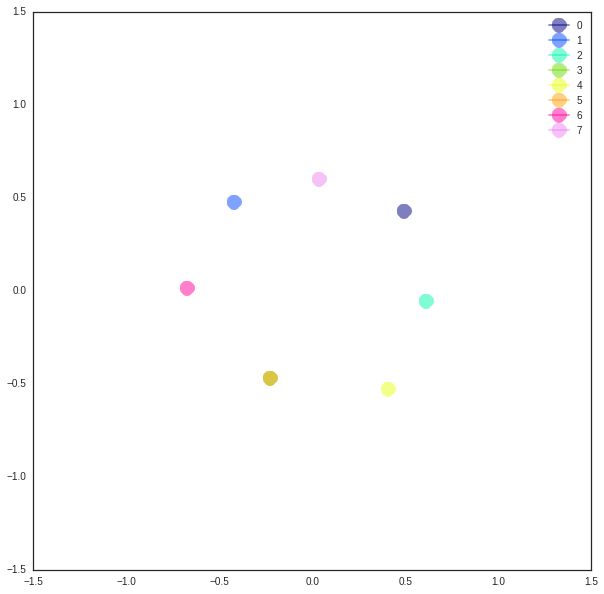

In [11]:
nexa_object.Nembedding = 2
nexa_object.calculate_embedding()
embed = nexa_object.embedding

# Set the color map
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, embed.shape[0])])
    

for i in range(embed.shape[0]):
    plt.plot(embed[i, 0], embed[i, 1], label=str(i), marker='o',
             markersize=15, alpha=0.5)
    plt.hold(True)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])    
plt.legend()

# Change the size
figure = plt.gcf()
figure.set_size_inches(10, 10)

#### Sensor Clustering

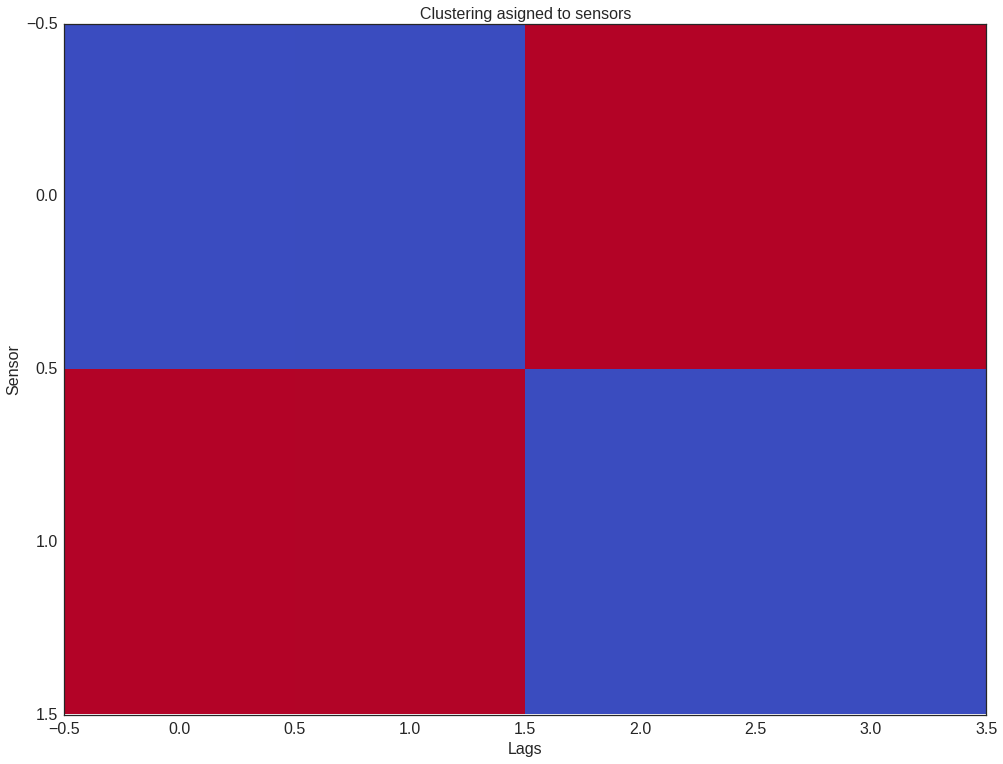

In [12]:
%matplotlib inline
nexa_object.Nspatial_clusters = 2
nexa_object.calculate_spatial_clustering(centers=True)
fig = visualize_cluster_matrix(nexa_object)

### Let's see how this looks in the embedding

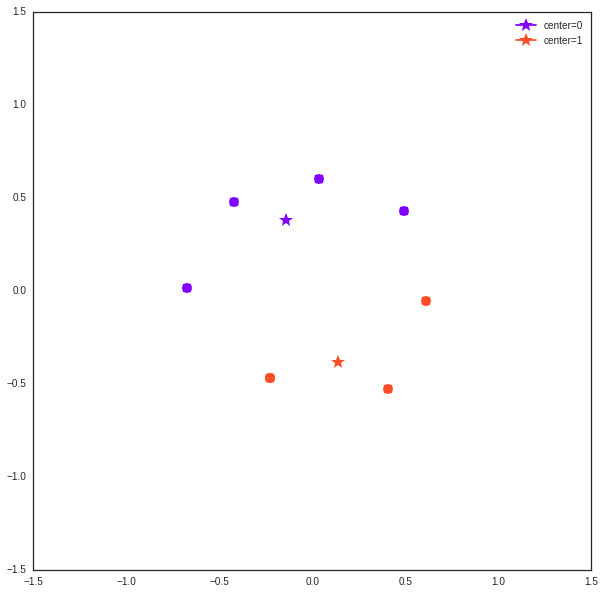

In [13]:
# Calculate centers and transformation from centers to indexes
centers = nexa_object.spatial_cluster_centers
index_to_cluster = nexa_object.index_to_cluster
nexa_object.calculate_cluster_to_indexes()
cluster_to_index = nexa_object.cluster_to_index

# Plot the centers
colormap = plt.cm.rainbow
colors = [colormap(i) for i in np.linspace(0, 0.9, centers[0].size)]

for index, pair in enumerate(zip(centers, colors)):
    center = pair[0]
    color = pair[1]
    # First we plot the center
    plt.plot(center[0], center[1], label='center='+str(index),
                markersize=15, marker='*', color=color)
    # Now all the points to that center
    indexes = cluster_to_index[index]
    for point in indexes:
        plt.plot(embed[point, 0], embed[point, 1], 'o',
                 markersize=10, color=color)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.legend()

# Change the size
figure = plt.gcf()
figure.set_size_inches(10, 10)